In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_rows', 50)

In [5]:
df = pd.read_csv('fifa21_train.csv')
df.head()
df.tail()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,Left,5,"Feb 8, 2018",NaN,€625K,€3K,€891K,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3 ★,2★,Medium,Medium,1 ★,75,28,56,59,60,69,3,48+2,48+2,48+2,55+0,52+0,52+0,52+0,55+0,54+2,54+2,54+2,58+2,56+2,56+2,56+2,58+2,63+2,60+2,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,Right,4,"Jul 1, 2019",NaN,€1.6M,€4K,€2.9M,2019 ~ 2022,84,12,14,13,29,16.0,96,17,15.0,19,27,18,237,40,40,38.0,65,54.0,217,50,59.0,29,64,15,101,30,22.0,15.0,15.0,19,56.0,41,12,16,13.0,347,72,67,66,70,72,1123,387,2 ★,1★,Medium,Medium,1 ★,72,67,66,72,40,70,3,28+2,28+2,28+2,24+0,26+0,26+0,26+0,24+0,24+2,24+2,24+2,25+2,25+2,25+2,25+2,25+2,25+2,26+2,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,Right,8,"Jan 23, 2019",NaN,€1.1M,€2K,€1.7M,2019 ~ 2024,286,64,66,51,64,41.0,291,71,57.0,38,58,67,388,77,76,86.0,62,87.0,278,61,71.0,64,37,45,241,27,25.0,66.0,58.0,65,58.0,62,37,12,13.0,57,13,10,11,7,16,1603,337,3 ★,3★,High,Medium,1 ★,76,60,60,72,26,43,6,62+2,62+2,62+2,67+0,65+0,65+0,65+0,67+0,65+2,65+2,65+2,66+2,58+2,58+2,58+2,66+2,49+2,44+2,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,Right,7,NaN,NaN,€0,€0,€0,2010,254,64,66,51,73,NaN,284,74,NaN,63,72,75,198,71,72,NaN,55,NaN,258,61,NaN,71,64,62,241,64,61.0,63.0,NaN,53,NaN,113,55,58,NaN,81,9,24,72,24,24,1429,400,3 ★,1★,NaN,NaN,3 ★,72,63,70,72,57,66,3,68+0,68+0,68+0,71+0,68+0,68+0,68+0,71+0,72+0,72+0,72+0,71+0,71+0,71+0,71+0,71+0,66+0,68+0,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68
11700,236507,T. Conechny,22,Argentina,Portland Timbers,CAM,ST CAM LM,Portland Timbers 2019 ~ 2020,"5'7""",143lbs,Left,9,"Jul 22, 2019",NaN,€700K,€2K,€1.2M,2019 ~ 2020,289,43,64,65,64,53.0,267,64,41.0,43,55,64,391,81,78,87.0,61,84.0,312,62,85.0,65,42,58,244,34,20.0,66.0,63.0,61,56.0,56,20,18,18.0,48,10,8,14,8,8,1607,336,3 ★,3★,High,Low,1 ★,79,62,56,67,24,48,8,64+2,64+2,64+2,65+0,65+0,65+0,65+0,65+0,65+2,65+2,65+2,63+2,58+2,58+2,58+2,63+2,46+2,43+2,43+2,43+2,46+2,44+2,36+2,36+2,36+2,44+2,15+2,64


In [6]:
df.shape

(11701, 101)

In [7]:
df2 = pd.read_csv('fifa21_validate.csv')
df2.head()
df2.tail()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
1994,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",143lbs,Left,11,"Aug 9, 2020",NaN,€325K,€1K,€731K,2020 ~ 2023,197,59,23,42,51,22.0,207,51,30.0,29,41,56,344,74,78,63.0,50,79.0,245,31,66.0,68,50,30,232,59,52.0,51.0,34.0,36,59.0,167,52,57,58.0,51,6,15,7,10,13,1443,315,3 ★,2★,High,Medium,1 ★,76,28,46,55,53,57,4,44+2,44+2,44+2,51+0,48+0,48+0,48+0,51+0,48+2,48+2,48+2,53+2,48+2,48+2,48+2,53+2,58+2,52+2,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
1995,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",176lbs,Right,9,"Jan 1, 2017",NaN,€190K,€700,€285K,2017 ~ 2021,77,13,9,14,34,7.0,70,9,13.0,10,25,13,192,31,30,36.0,59,36.0,177,43,44.0,23,60,7,88,21,8.0,4.0,36.0,19,33.0,36,14,11,11.0,288,60,55,57,54,62,928,318,2 ★,1★,Medium,Medium,1 ★,60,55,57,62,30,54,3,22+2,22+2,22+2,20+0,22+0,22+0,22+0,20+0,23+2,23+2,23+2,22+2,24+2,24+2,24+2,22+2,20+2,23+2,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
1996,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",146lbs,Left,0,"Feb 13, 2019",NaN,€8M,€9K,€12M,2019 ~ 2024,332,76,72,34,79,71.0,373,77,76.0,65,77,78,351,64,65,74.0,73,75.0,329,63,60.0,83,57,66,306,41,40.0,75.0,81.0,69,75.0,118,36,43,39.0,58,12,15,16,9,6,1867,388,4 ★,4★,High,Medium,2 ★,65,69,78,77,39,60,15,67+2,67+2,67+2,74+0,73+0,73+0,73+0,74+0,76+0,76+0,76+0,75+1,74+2,74+2,74+2,75+1,62+2,60+2,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
1997,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",176lbs,Right,0,"Aug 13, 2020",NaN,€140K,€4K,€245K,2020 ~ 2021,268,58,44,61,62,43.0,261,56,47.0,37,60,61,288,54,52,57.0,61,64.0,300,53,65.0,68,68,46,297,74,62.0,54.0,56.0,51,60.0,182,61,62,59.0,43,10,7,9,9,8,1639,346,3 ★,2★,Medium,Medium,1 ★,53,47,58,58,61,69,4,55+2,55+2,55+2,56+0,55+0,55+0,55+0,56+0,57+2,57+2,57+2,57+2,59+2,59+2,59+2,57+2,60+2,62+1,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63
1998,254882,A. Oeynhausen,18,Germany,SC Paderborn 07,CAM,CM,SC Paderborn 07 2020 ~ 2022,"5'10""",150lbs,Right,16,"Jan 1, 2020",NaN,€425K,€1K,€946K,2020 ~ 2022,276,49,54,51,70,52.0,300,60,61.0,51,66,62,326,68,61,69.0,55,73.0,256,65,50.0,52,45,44,260,45,38.0,51.0,63.0,63,65.0,159,48,57,54.0,57,8,15,11,11,12,1634,339,3 ★,2★,Medium,Medium,1 ★,64,54,62,62,50,47,5,57+2,57+2,57+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,60+2,60+2,60+2,60+2,60+2,55+2,55+2,55+2,55+2,55+2,54+2,51+2,51+2,51+2,54+2,16+2,60


In [8]:
df2.shape

(1999, 101)

In [9]:
def preprocess(df):
    cols = []
    for column in df.columns:
        cols.append(column.lower())
    df.columns = cols
    df.dropna(axis=0,how='all',inplace=True)
    df.dropna(axis=1,how='all',inplace=True)
    return df
df = preprocess(pd.read_csv('fifa21_train.csv'))
df.head()

,id,name,age,nationality,club,bp,position,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [10]:
def preprocess(df2):
    cols = []
    for column in df2.columns:
        cols.append(column.lower())
    df2.columns = cols
    df2.dropna(axis=0,how='all',inplace=True)
    df2.dropna(axis=1,how='all',inplace=True)
    return df2
df2 = preprocess(pd.read_csv('fifa21_validate.csv'))
df2.head()

,id,name,age,nationality,club,bp,position,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,Right,7,"Feb 8, 2018","Jun 30, 2021",€975K,€5K,€0,"Jun 30, 2021 On Loan",230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,48+2,48+2,48+2,48+0,47+0,47+0,47+0,48+0,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,59+2,61+2,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,Right,5,"Jan 20, 2020",NaN,€1.2M,€3K,€2.2M,2020 ~ 2020,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,64+2,64+2,64+2,68+0,68+0,68+0,68+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,49+2,47+2,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,Right,17,"Nov 28, 2018",NaN,€120K,€500,€249K,2018 ~ 2020,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,18+2,18+2,18+2,15+0,17+0,17+0,17+0,15+0,17+2,17+2,17+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,Right,23,"Jan 10, 2020",NaN,€160K,€500,€464K,2020 ~ 2022,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3 ★,2★,Medium,Medium,1 ★,58,34,47,52,53,59,6,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,47+2,47+2,47+2,49+2,49+2,49+2,49+2,49+2,53+2,54+2,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,Right,5,"Jul 1, 2019",NaN,€2.3M,€13K,€4.3M,2019 ~ 2023,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4 ★,2★,Medium,Medium,1 ★,67,62,68,70,69,71,45,63+2,63+2,63+2,66+0,66+0,66+0,66+0,66+0,68+2,68+2,68+2,67+2,70+2,70+2,70+2,67+2,70+2,72+2,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


We deicedd to drop the following columns: 'age', 'nationality', 'position', 'club', 'team & contract', 'height', 'weight', 'foot', 'growth', 'joined', 'loan date end', 'value', 'wage', 'release clause', 'contract'

Split dataset into two - one with overall attributes, one with individual attributes

Overall Attribute Columns:
goalkeeping
mentality
defending
power
movement
skill
attacking

total stats
base stats


In [11]:
# dropping columns, including the columns that are summations of attributes (such as attacking, goalkeeping ...)

df = df.drop(['age', 'nationality', 'position', 'club', 'team & contract', 'height', 'weight', 'foot', 'growth', 'joined', 'loan date end', 'value', 'wage', 'release clause', 'contract', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping'], axis=1)
df.head()

,id,name,bp,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,CM,54,47,43,70,44.0,61,44.0,55,63,63,64,73,61.0,66,82.0,62,73.0,71,55,45,54,52.0,62.0,68.0,54,54.0,49,56,43.0,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,ST,66,79,76,68,76.0,83,78.0,72,63,79,83,83,88.0,75,75.0,74,81.0,75,74,68,54,33.0,78.0,72.0,76,70.0,35,20,22.0,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,CAM,73,76,34,78,75.0,85,89.0,91,74,85,84,76,93.0,78,93.0,79,34.0,75,42,78,75,26.0,80.0,78.0,73,82.0,23,29,28.0,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,CDM,44,42,58,62,36.0,54,41.0,46,57,61,54,59,59.0,55,55.0,57,60.0,64,58,38,61,57.0,31.0,54.0,54,48.0,55,58,55.0,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,CDM,49,37,61,68,34.0,64,44.0,45,61,66,66,66,61.0,62,69.0,61,34.0,81,61,43,66,60.0,55.0,64.0,49,58.0,58,61,66.0,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [12]:
# dropping columns, including the columns that are summations of attributes (such as attacking, goalkeeping ...)

df2 = df2.drop(['age', 'nationality', 'position', 'club', 'team & contract', 'height', 'weight', 'foot', 'growth', 'joined', 'loan date end', 'value', 'wage', 'release clause', 'contract', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping'], axis=1)
df2.head()

,id,name,bp,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,219461,E. Palmer-Brown,CB,47,21,62,60,40.0,44,43.0,36,51,54,60,68,63.0,63,49.0,48,77.0,51,87,25,68,62.0,38.0,39.0,39,49.0,68,67,65.0,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,48+2,48+2,48+2,48+0,47+0,47+0,47+0,48+0,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,59+2,61+2,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,CAM,62,60,44,62,70.0,76,68.0,56,60,70,77,72,83.0,64,79.0,76,62.0,63,47,75,72,26.0,64.0,64.0,60,65.0,19,23,19.0,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,64+2,64+2,64+2,68+0,68+0,68+0,68+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,49+2,47+2,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,GK,7,5,11,21,4.0,6,8.0,8,20,10,28,25,33.0,41,38.0,40,49.0,22,54,6,20,9.0,7.0,26.0,14,31.0,8,9,10.0,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,18+2,18+2,18+2,15+0,17+0,17+0,17+0,15+0,17+2,17+2,17+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,CDM,38,31,55,59,32.0,51,34.0,38,47,54,59,58,56.0,48,54.0,48,48.0,60,58,28,61,55.0,33.0,40.0,41,59.0,53,52,54.0,7,5,13,5,6,1381,303,3 ★,2★,Medium,Medium,1 ★,58,34,47,52,53,59,6,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,47+2,47+2,47+2,49+2,49+2,49+2,49+2,49+2,53+2,54+2,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,CDM,57,59,45,78,56.0,71,57.0,51,74,74,68,66,66.0,64,56.0,73,56.0,74,72,62,66,78.0,53.0,62.0,55,63.0,72,68,71.0,12,7,13,15,13,1864,407,4 ★,2★,Medium,Medium,1 ★,67,62,68,70,69,71,45,63+2,63+2,63+2,66+0,66+0,66+0,66+0,66+0,68+2,68+2,68+2,67+2,70+2,70+2,70+2,67+2,70+2,72+2,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


### Saving the Player ID and Name as a separate dataframe called identity as we may need that later

In [13]:
identity = df.loc[:,['id','name']]
df = df.drop(['id', 'name'], axis=1)
identity.head()

,id,name
0,184383,A. Pasche
1,188044,Alan Carvalho
2,184431,S. Giovinco
3,233796,J. Evans
4,234799,Y. Demoncy


In [14]:
identity2 = df2.loc[:,['id','name']]
df2 = df2.drop(['id', 'name'], axis=1)
identity2.head()

,id,name
0,219461,E. Palmer-Brown
1,221896,D. Avdijaj
2,247428,D. Ochoa
3,255120,N. Kenneh
4,215556,E. Fernandes


In [15]:
identity.shape

(11701, 2)

In [16]:
identity2.shape

(1999, 2)

We also decided to drop columns ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'] from our df as we did not see the point in retaining this information. We could convert it from string to integers, but the information seems redundant when we have their attribute stats already in the dataset in other columns

In [17]:
def cleanup(df):

    todo = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

    newlist = []

    for column in todo:
        val = []
        for item in df[column]:
            if "+" in item:
                item = np.int64(item.split('+')[0]) + np.int64(item.split('+')[1])
                newlist.append(item)
            elif "-" in item:
                item = np.int64(item.split('-')[0]) - np.int64(item.split('-')[1])
                newlist.append(item)
            else:
                item = item
       
    for col in range(len(todo)):
        df[todo[col]] = newlist[col]

    df.head()


In [18]:
cleanup(df)

In [19]:
cleanup(df2)

In [20]:
df.head()

,bp,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,CM,54,47,43,70,44.0,61,44.0,55,63,63,64,73,61.0,66,82.0,62,73.0,71,55,45,54,52.0,62.0,68.0,54,54.0,49,56,43.0,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,64
1,ST,66,79,76,68,76.0,83,78.0,72,63,79,83,83,88.0,75,75.0,74,81.0,75,74,68,54,33.0,78.0,72.0,76,70.0,35,20,22.0,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,77
2,CAM,73,76,34,78,75.0,85,89.0,91,74,85,84,76,93.0,78,93.0,79,34.0,75,42,78,75,26.0,80.0,78.0,73,82.0,23,29,28.0,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,80
3,CDM,44,42,58,62,36.0,54,41.0,46,57,61,54,59,59.0,55,55.0,57,60.0,64,58,38,61,57.0,31.0,54.0,54,48.0,55,58,55.0,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,59
4,CDM,49,37,61,68,34.0,64,44.0,45,61,66,66,66,61.0,62,69.0,61,34.0,81,61,43,66,60.0,55.0,64.0,49,58.0,58,61,66.0,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,65


In [21]:
df2.head()

,bp,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,CB,47,21,62,60,40.0,44,43.0,36,51,54,60,68,63.0,63,49.0,48,77.0,51,87,25,68,62.0,38.0,39.0,39,49.0,68,67,65.0,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,67
1,CAM,62,60,44,62,70.0,76,68.0,56,60,70,77,72,83.0,64,79.0,76,62.0,63,47,75,72,26.0,64.0,64.0,60,65.0,19,23,19.0,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,68
2,GK,7,5,11,21,4.0,6,8.0,8,20,10,28,25,33.0,41,38.0,40,49.0,22,54,6,20,9.0,7.0,26.0,14,31.0,8,9,10.0,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,54
3,CDM,38,31,55,59,32.0,51,34.0,38,47,54,59,58,56.0,48,54.0,48,48.0,60,58,28,61,55.0,33.0,40.0,41,59.0,53,52,54.0,7,5,13,5,6,1381,303,3 ★,2★,Medium,Medium,1 ★,58,34,47,52,53,59,6,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,55
4,CDM,57,59,45,78,56.0,71,57.0,51,74,74,68,66,66.0,64,56.0,73,56.0,74,72,62,66,78.0,53.0,62.0,55,63.0,72,68,71.0,12,7,13,15,13,1864,407,4 ★,2★,Medium,Medium,1 ★,67,62,68,70,69,71,45,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,70


In [22]:
# df = df.drop(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'],axis=1)
# df.head()

In [23]:
df.shape

(11701, 77)

In [24]:
df2.shape

(1999, 77)

In [25]:
# columns with NaNs: position, volleys, curve, agility, balance, jumping, interceptions, positioning, visiona/w, d/w

df.isna().sum()

bp                  0
crossing            0
finishing           0
heading accuracy    0
short passing       0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
ova                 0
Length: 77, dtype: int64

In [26]:

round(df.isna().sum()/len(df),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,bp,0.0
1,crossing,0.0
2,finishing,0.0
3,heading accuracy,0.0
4,short passing,0.0
...,...,...
72,cb,0.0
73,rcb,0.0
74,rb,0.0
75,gk,0.0


In [27]:

round(df2.isna().sum()/len(df2),4)*100  # shows the percentage of null values in a column
nulls_df2 = pd.DataFrame(round(df2.isna().sum()/len(df2),4)*100)
nulls_df2
nulls_df2 = nulls_df2.reset_index()
nulls_df2
nulls_df2.columns = ['header_name', 'percent_nulls']
nulls_df2

,header_name,percent_nulls
0,bp,0.0
1,crossing,0.0
2,finishing,0.0
3,heading accuracy,0.0
4,short passing,0.0
...,...,...
72,cb,0.0
73,rcb,0.0
74,rb,0.0
75,gk,0.0


In [28]:
df.shape

(11701, 77)

### there are not a lot of player rows with NaN values, we decided to drop those player rows with NaN values

In [29]:
df.shape

(11701, 77)

I decided to drop all NaNs that remained in "composure" as that was the column with the largest remaining % of NaNs

In [30]:
df = df[df['composure'].isna()==False] # Since these nulls are not a lot, we can filter them
df.isna().sum()
df.shape

(11422, 77)

In [31]:
df2 = df2[df2['composure'].isna()==False] # Since these nulls are not a lot, we can filter them
df2.isna().sum()
df2.shape

(1949, 77)

This cut my df down to 11422 rows of data with no NaN values. That's about 97% of the original dataset, and should be good to process

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
df.isna().sum()

bp                  0
crossing            0
finishing           0
heading accuracy    0
short passing       0
volleys             0
dribbling           0
curve               0
fk accuracy         0
long passing        0
ball control        0
acceleration        0
sprint speed        0
agility             0
reactions           0
balance             0
shot power          0
jumping             0
stamina             0
strength            0
long shots          0
aggression          0
interceptions       0
positioning         0
vision              0
penalties           0
composure           0
marking             0
standing tackle     0
sliding tackle      0
gk diving           0
gk handling         0
gk kicking          0
gk positioning      0
gk reflexes         0
total stats         0
base stats          0
w/f                 0
sm                  0
a/w                 0
d/w                 0
ir                  0
pac                 0
sho                 0
pas                 0
dri       

In [34]:
display(df2.isna().sum())

bp                  0
crossing            0
finishing           0
heading accuracy    0
short passing       0
volleys             0
dribbling           0
curve               0
fk accuracy         0
long passing        0
ball control        0
acceleration        0
sprint speed        0
agility             0
reactions           0
balance             0
shot power          0
jumping             0
stamina             0
strength            0
long shots          0
aggression          0
interceptions       0
positioning         0
vision              0
penalties           0
composure           0
marking             0
standing tackle     0
sliding tackle      0
gk diving           0
gk handling         0
gk kicking          0
gk positioning      0
gk reflexes         0
total stats         0
base stats          0
w/f                 0
sm                  0
a/w                 0
d/w                 0
ir                  0
pac                 0
sho                 0
pas                 0
dri       

In [35]:
pd.set_option('display.max_rows', 50)

### Now cleaning the categorical values, first removing the * from the categorical columns w/f, sm and ir below and saving them as np.float64

In [36]:
print(df.dtypes)

bp                  object
crossing             int64
finishing            int64
heading accuracy     int64
short passing        int64
                     ...  
cb                   int64
rcb                  int64
rb                   int64
gk                   int64
ova                  int64
Length: 77, dtype: object


In [37]:
df['w/f'] = df['w/f'].str.replace('★','').astype(np.float64)
df['sm'] = df['sm'].str.replace('★','').astype(np.float64)
df['ir'] = df['ir'].str.replace('★','').astype(np.float64)

In [38]:
df2['w/f'] = df2['w/f'].str.replace('★','').astype(np.float64)
df2['sm'] = df2['sm'].str.replace('★','').astype(np.float64)
df2['ir'] = df2['ir'].str.replace('★','').astype(np.float64)

In [39]:
df2.head()

,bp,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,CB,47,21,62,60,40.0,44,43.0,36,51,54,60,68,63.0,63,49.0,48,77.0,51,87,25,68,62.0,38.0,39.0,39,49.0,68,67,65.0,11,8,15,13,9,1551,334,2.0,2.0,Low,High,1.0,64,30,50,50,66,74,34,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,67
1,CAM,62,60,44,62,70.0,76,68.0,56,60,70,77,72,83.0,64,79.0,76,62.0,63,47,75,72,26.0,64.0,64.0,60,65.0,19,23,19.0,14,13,9,9,8,1726,358,4.0,3.0,High,Low,1.0,74,67,62,74,24,57,12,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,68
2,GK,7,5,11,21,4.0,6,8.0,8,20,10,28,25,33.0,41,38.0,40,49.0,22,54,6,20,9.0,7.0,26.0,14,31.0,8,9,10.0,56,52,53,53,55,808,295,2.0,1.0,Medium,Medium,1.0,56,52,53,55,26,53,3,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,54
3,CDM,38,31,55,59,32.0,51,34.0,38,47,54,59,58,56.0,48,54.0,48,48.0,60,58,28,61,55.0,33.0,40.0,41,59.0,53,52,54.0,7,5,13,5,6,1381,303,3.0,2.0,Medium,Medium,1.0,58,34,47,52,53,59,6,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,55
4,CDM,57,59,45,78,56.0,71,57.0,51,74,74,68,66,66.0,64,56.0,73,56.0,74,72,62,66,78.0,53.0,62.0,55,63.0,72,68,71.0,12,7,13,15,13,1864,407,4.0,2.0,Medium,Medium,1.0,67,62,68,70,69,71,45,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,70


In [40]:
df['w/f'].dtypes

dtype('float64')

In [41]:
df['sm'].dtypes

dtype('float64')

In [42]:
df['ir'].dtypes

dtype('float64')

hits has numerical values and should also be a float, but it has thousands abbreviated with K for Kilo, I could probably do this with a loop, but for now I found it easier to just go one by one and have the different .xK values replaced with x00 and then convert the column to float

In [43]:
df['hits'] = df['hits'].str.replace('.1K','100')
df['hits'] = df['hits'].str.replace('.2K','200')
df['hits'] = df['hits'].str.replace('.3K','300')
df['hits'] = df['hits'].str.replace('.4K','300')
df['hits'] = df['hits'].str.replace('.5K','500')
df['hits'] = df['hits'].str.replace('.6K','600')
df['hits'] = df['hits'].str.replace('.7K','700')
df['hits'] = df['hits'].str.replace('.8K','800')
df['hits'] = df['hits'].str.replace('.9K','900')
df['hits'] = df['hits'].str.replace('K','000')

/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/36928772.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['hits'] = df['hits'].str.replace('.1K','100')
/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/36928772.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['hits'] = df['hits'].str.replace('.2K','200')
/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/36928772.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['hits'] = df['hits'].str.replace('.3K','300')
/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/36928772.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['hits'] = df['hits'].str.replace('.4K','300')
/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/36928772.py:5: FutureWarning: The defaul

In [44]:
df2['hits'] = df2['hits'].str.replace('.1K','100')
df2['hits'] = df2['hits'].str.replace('.2K','200')
df2['hits'] = df2['hits'].str.replace('.3K','300')
df2['hits'] = df2['hits'].str.replace('.4K','300')
df2['hits'] = df2['hits'].str.replace('.5K','500')
df2['hits'] = df2['hits'].str.replace('.6K','600')
df2['hits'] = df2['hits'].str.replace('.7K','700')
df2['hits'] = df2['hits'].str.replace('.8K','800')
df2['hits'] = df2['hits'].str.replace('.9K','900')
df2['hits'] = df2['hits'].str.replace('K','000')

/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/2890745310.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['hits'] = df2['hits'].str.replace('.1K','100')
/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/2890745310.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['hits'] = df2['hits'].str.replace('.2K','200')
/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/2890745310.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['hits'] = df2['hits'].str.replace('.3K','300')
/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/2890745310.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['hits'] = df2['hits'].str.replace('.4K','300')
/var/folders/yb/h9hkbtf17cq8_7fj_jjzdpcm0000gn/T/ipykernel_8193/2890745310.py:5: FutureW

In [45]:
df['hits'] = pd.to_numeric(df['hits'])

In [46]:
df2['hits'] = pd.to_numeric(df2['hits'])

In [47]:
df['hits'].dtypes

dtype('int64')

In [48]:
print(df.dtypes)

bp                  object
crossing             int64
finishing            int64
heading accuracy     int64
short passing        int64
                     ...  
cb                   int64
rcb                  int64
rb                   int64
gk                   int64
ova                  int64
Length: 77, dtype: object


### Splitting numericals and categoricals now that cleanup is done

In [49]:
numerical = df.select_dtypes(include = np.number)
categorical = df.select_dtypes(include = object)
display(numerical.head())
display(categorical.head())

,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,54,47,43,70,44.0,61,44.0,55,63,63,64,73,61.0,66,82.0,62,73.0,71,55,45,54,52.0,62.0,68.0,54,54.0,49,56,43.0,7,12,14,9,6,1682,357,4.0,2.0,1.0,69,51,63,63,51,60,3,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,64
1,66,79,76,68,76.0,83,78.0,72,63,79,83,83,88.0,75,75.0,74,81.0,75,74,68,54,33.0,78.0,72.0,76,70.0,35,20,22.0,11,7,14,7,16,1961,412,3.0,4.0,2.0,83,75,68,82,33,71,44,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,77
2,73,76,34,78,75.0,85,89.0,91,74,85,84,76,93.0,78,93.0,79,34.0,75,42,78,75,26.0,80.0,78.0,73,82.0,23,29,28.0,6,3,6,3,3,1925,404,4.0,4.0,2.0,80,77,78,86,27,56,73,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,80
3,44,42,58,62,36.0,54,41.0,46,57,61,54,59,59.0,55,55.0,57,60.0,64,58,38,61,57.0,31.0,54.0,54,48.0,55,58,55.0,8,9,6,7,12,1527,329,2.0,2.0,1.0,57,44,54,57,57,60,7,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,59
4,49,37,61,68,34.0,64,44.0,45,61,66,66,66,61.0,62,69.0,61,34.0,81,61,43,66,60.0,55.0,64.0,49,58.0,58,61,66.0,8,9,15,5,15,1664,360,2.0,3.0,1.0,66,44,60,64,60,66,4,59,77,75,52,58,69,68,57,59,64,59,61,59,60,45,69,30,67,68,55,22,31,60,60,65,55,57,65


,bp,a/w,d/w
0,CM,High,Medium
1,ST,High,Low
2,CAM,High,Medium
3,CDM,Medium,Medium
4,CDM,Low,Medium


In [50]:
df.shape

(11422, 77)

In [51]:
numerical2 = df2.select_dtypes(include = np.number)
categorical2 = df2.select_dtypes(include = object)
display(numerical2.head())
display(categorical2.head())

,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,47,21,62,60,40.0,44,43.0,36,51,54,60,68,63.0,63,49.0,48,77.0,51,87,25,68,62.0,38.0,39.0,39,49.0,68,67,65.0,11,8,15,13,9,1551,334,2.0,2.0,1.0,64,30,50,50,66,74,34,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,67
1,62,60,44,62,70.0,76,68.0,56,60,70,77,72,83.0,64,79.0,76,62.0,63,47,75,72,26.0,64.0,64.0,60,65.0,19,23,19.0,14,13,9,9,8,1726,358,4.0,3.0,1.0,74,67,62,74,24,57,12,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,68
2,7,5,11,21,4.0,6,8.0,8,20,10,28,25,33.0,41,38.0,40,49.0,22,54,6,20,9.0,7.0,26.0,14,31.0,8,9,10.0,56,52,53,53,55,808,295,2.0,1.0,1.0,56,52,53,55,26,53,3,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,54
3,38,31,55,59,32.0,51,34.0,38,47,54,59,58,56.0,48,54.0,48,48.0,60,58,28,61,55.0,33.0,40.0,41,59.0,53,52,54.0,7,5,13,5,6,1381,303,3.0,2.0,1.0,58,34,47,52,53,59,6,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,55
4,57,59,45,78,56.0,71,57.0,51,74,74,68,66,66.0,64,56.0,73,56.0,74,72,62,66,78.0,53.0,62.0,55,63.0,72,68,71.0,12,7,13,15,13,1864,407,4.0,2.0,1.0,67,62,68,70,69,71,45,50,66,20,48,65,61,46,21,56,61,62,53,50,66,65,67,32,62,63,61,55,56,45,58,70,45,66,70


,bp,a/w,d/w
0,CB,Low,High
1,CAM,High,Low
2,GK,Medium,Medium
3,CDM,Medium,Medium
4,CDM,Medium,Medium


Checking correlations below to OVA

In [52]:
df['ls'].dtypes

dtype('int64')

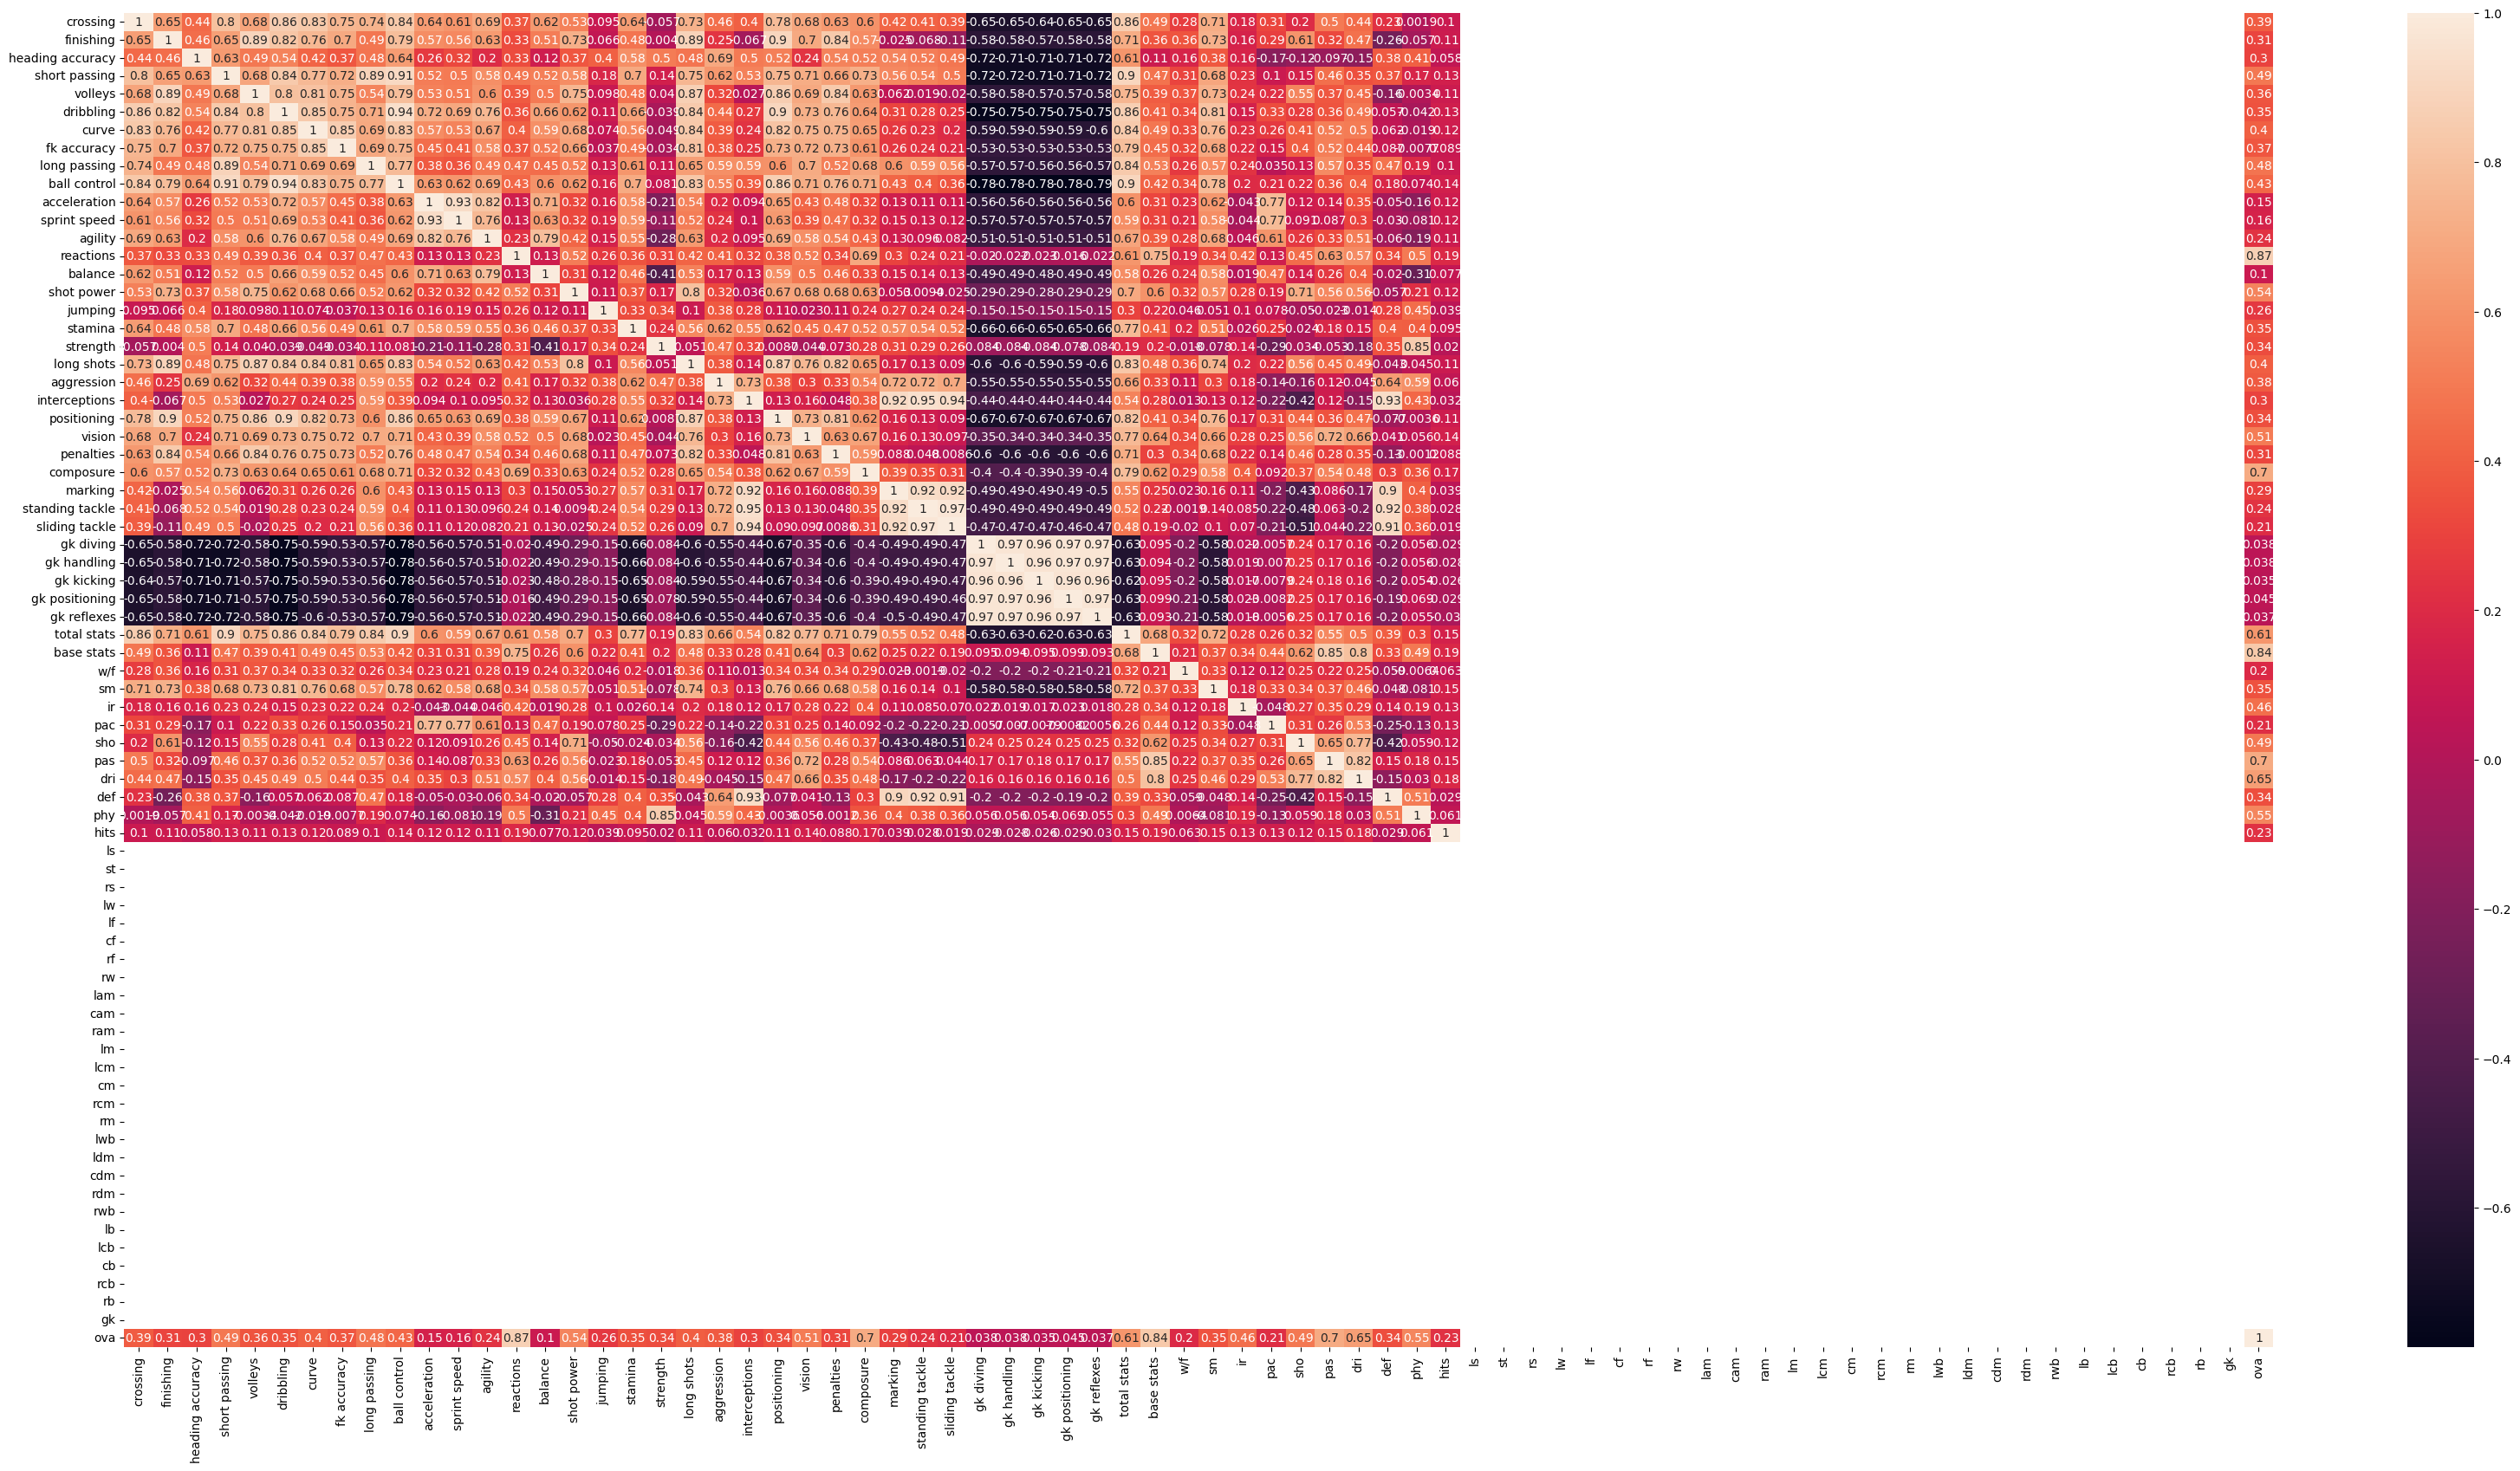

In [53]:
#checking correlations between variables
correlations_matrix = numerical.corr()
fig, ax=plt.subplots(figsize=(40,20))
ax=sns.heatmap(correlations_matrix, annot=True)
plt.show()

[Text(0, 0.5, 'ova'),
 Text(0, 1.5, 'reactions'),
 Text(0, 2.5, 'base stats'),
 Text(0, 3.5, 'composure'),
 Text(0, 4.5, 'pas'),
 Text(0, 5.5, 'dri'),
 Text(0, 6.5, 'total stats'),
 Text(0, 7.5, 'phy'),
 Text(0, 8.5, 'shot power'),
 Text(0, 9.5, 'vision'),
 Text(0, 10.5, 'short passing'),
 Text(0, 11.5, 'sho'),
 Text(0, 12.5, 'long passing'),
 Text(0, 13.5, 'ir'),
 Text(0, 14.5, 'ball control'),
 Text(0, 15.5, 'curve'),
 Text(0, 16.5, 'long shots'),
 Text(0, 17.5, 'crossing'),
 Text(0, 18.5, 'aggression'),
 Text(0, 19.5, 'fk accuracy'),
 Text(0, 20.5, 'volleys'),
 Text(0, 21.5, 'sm'),
 Text(0, 22.5, 'dribbling'),
 Text(0, 23.5, 'stamina'),
 Text(0, 24.5, 'def'),
 Text(0, 25.5, 'positioning'),
 Text(0, 26.5, 'strength'),
 Text(0, 27.5, 'penalties'),
 Text(0, 28.5, 'finishing'),
 Text(0, 29.5, 'heading accuracy'),
 Text(0, 30.5, 'interceptions'),
 Text(0, 31.5, 'marking'),
 Text(0, 32.5, 'jumping'),
 Text(0, 33.5, 'standing tackle'),
 Text(0, 34.5, 'agility'),
 Text(0, 35.5, 'hits'),
 Te

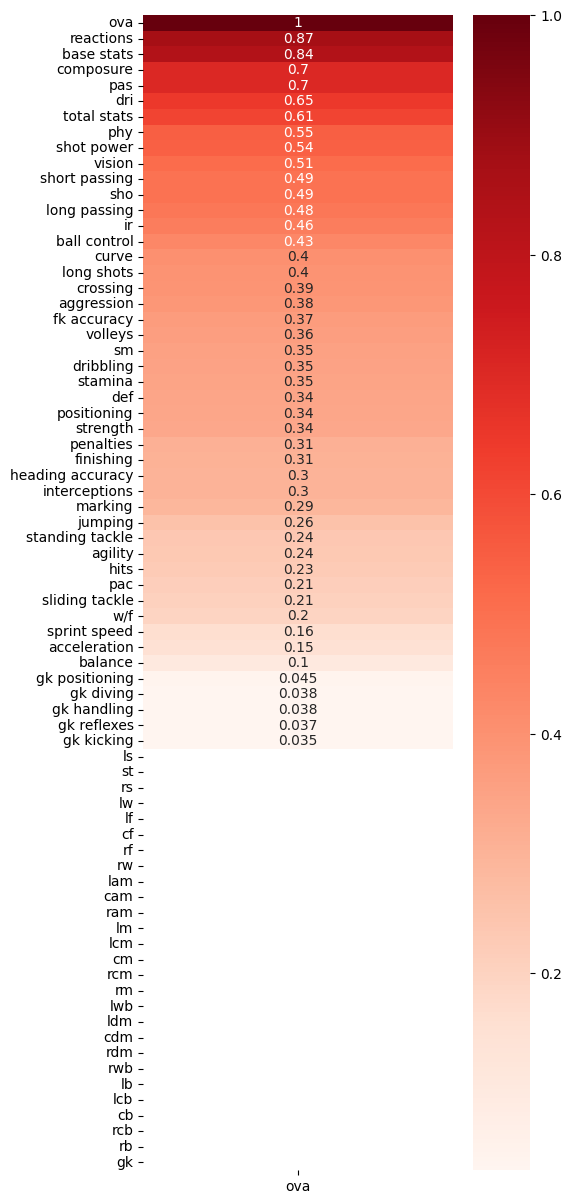

In [54]:
corr = numerical.corr().loc[:,['ova']]
fig, ax = plt.subplots(figsize = (5,15))
ax = sns.heatmap(corr.sort_values(by=['ova'], ascending = False), ax = ax, annot = True, cbar = True, cmap='Reds')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10)


### MinMaxing numericals below

In [55]:
MinMaxtransformer = MinMaxScaler().fit(numerical)
num_minmax = MinMaxtransformer.transform(numerical) # does the actual scaling
print(type(num_minmax))
num_minmax = pd.DataFrame(num_minmax,columns=numerical.columns)
display(num_minmax.head())
print(type(num_minmax))

<class 'numpy.ndarray'>


,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,0.545455,0.478261,0.431818,0.710843,0.465116,0.615385,0.444444,0.561798,0.642857,0.637363,0.607143,0.729412,0.573171,0.591549,0.8125,0.602410,0.685714,0.694118,0.454545,0.455556,0.517241,0.552941,0.645161,0.682353,0.547619,0.500000,0.516854,0.595238,0.440476,0.056818,0.116279,0.139535,0.078652,0.045455,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.515625,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395833
1,0.681818,0.826087,0.806818,0.686747,0.837209,0.857143,0.822222,0.752809,0.642857,0.813187,0.833333,0.847059,0.902439,0.718310,0.7250,0.746988,0.800000,0.741176,0.701299,0.711111,0.517241,0.329412,0.817204,0.729412,0.809524,0.690476,0.359551,0.166667,0.190476,0.102273,0.058140,0.139535,0.056180,0.159091,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.687500,0.004458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667
2,0.761364,0.793478,0.329545,0.807229,0.825581,0.879121,0.944444,0.966292,0.773810,0.879121,0.845238,0.764706,0.963415,0.760563,0.9500,0.807229,0.128571,0.741176,0.285714,0.822222,0.758621,0.247059,0.838710,0.800000,0.773810,0.833333,0.224719,0.273810,0.261905,0.045455,0.011628,0.046512,0.011236,0.011364,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.453125,0.007611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.729167
3,0.431818,0.423913,0.602273,0.614458,0.372093,0.538462,0.411111,0.460674,0.571429,0.615385,0.488095,0.564706,0.548780,0.436620,0.4750,0.542169,0.500000,0.611765,0.493506,0.377778,0.597701,0.611765,0.311828,0.517647,0.547619,0.428571,0.584270,0.619048,0.583333,0.068182,0.081395,0.046512,0.056180,0.113636,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.515625,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291667
4,0.488636,0.369565,0.636364,0.686747,0.348837,0.648352,0.444444,0.449438,0.619048,0.670330,0.630952,0.647059,0.573171,0.535211,0.6500,0.590361,0.128571,0.811765,0.532468,0.433333,0.655172,0.647059,0.569892,0.635294,0.488095,0.547619,0.617978,0.654762,0.714286,0.068182,0.081395,0.151163,0.033708,0.147727,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.609375,0.000109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.416667


<class 'pandas.core.frame.DataFrame'>


In [56]:
MinMaxtransformer = MinMaxScaler().fit(numerical2)
num_minmax2 = MinMaxtransformer.transform(numerical2) # does the actual scaling
print(type(num_minmax2))
num_minmax2 = pd.DataFrame(num_minmax2,columns=numerical2.columns)
display(num_minmax2.head())
print(type(num_minmax2))

<class 'numpy.ndarray'>


,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,0.493976,0.195402,0.635294,0.604938,0.450,0.448276,0.430233,0.337209,0.518987,0.543210,0.578313,0.679012,0.592105,0.524590,0.386667,0.442857,0.774648,0.481928,0.911765,0.247059,0.690476,0.690476,0.390805,0.358025,0.376471,0.4625,0.707865,0.719512,0.695122,0.095238,0.066667,0.152174,0.125000,0.079545,0.526038,0.338710,0.25,0.25,0.0,0.531250,0.138889,0.328125,0.327869,0.688312,0.719298,0.010344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441860
1,0.674699,0.643678,0.423529,0.629630,0.825,0.816092,0.720930,0.569767,0.632911,0.740741,0.783133,0.728395,0.855263,0.540984,0.786667,0.842857,0.563380,0.626506,0.323529,0.835294,0.738095,0.261905,0.689655,0.666667,0.623529,0.6625,0.157303,0.182927,0.134146,0.130952,0.122222,0.086957,0.079545,0.068182,0.641397,0.435484,0.75,0.50,0.0,0.687500,0.652778,0.515625,0.721311,0.142857,0.421053,0.003003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465116
2,0.012048,0.011494,0.035294,0.123457,0.000,0.011494,0.023256,0.011628,0.126582,0.000000,0.192771,0.148148,0.197368,0.163934,0.240000,0.328571,0.380282,0.132530,0.426471,0.023529,0.119048,0.059524,0.034483,0.197531,0.082353,0.2375,0.033708,0.012195,0.024390,0.630952,0.555556,0.565217,0.579545,0.602273,0.036256,0.181452,0.25,0.00,0.0,0.406250,0.444444,0.375000,0.409836,0.168831,0.350877,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139535
3,0.385542,0.310345,0.552941,0.592593,0.350,0.528736,0.325581,0.360465,0.468354,0.543210,0.566265,0.555556,0.500000,0.278689,0.453333,0.442857,0.366197,0.590361,0.485294,0.282353,0.607143,0.607143,0.333333,0.370370,0.400000,0.5875,0.539326,0.536585,0.560976,0.047619,0.033333,0.130435,0.034091,0.045455,0.413975,0.213710,0.50,0.25,0.0,0.437500,0.194444,0.281250,0.360656,0.519481,0.456140,0.001001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162791
4,0.614458,0.632184,0.435294,0.827160,0.650,0.758621,0.593023,0.511628,0.810127,0.790123,0.674699,0.654321,0.631579,0.540984,0.480000,0.800000,0.478873,0.759036,0.691176,0.682353,0.666667,0.880952,0.563218,0.641975,0.564706,0.6375,0.752809,0.731707,0.768293,0.107143,0.055556,0.130435,0.147727,0.125000,0.732367,0.633065,0.75,0.25,0.0,0.578125,0.583333,0.609375,0.655738,0.727273,0.666667,0.014014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511628


<class 'pandas.core.frame.DataFrame'>


### doing X/y split below

In [57]:
X = num_minmax.drop('ova', axis=1)
y = num_minmax['ova']
X.head()

,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0.545455,0.478261,0.431818,0.710843,0.465116,0.615385,0.444444,0.561798,0.642857,0.637363,0.607143,0.729412,0.573171,0.591549,0.8125,0.602410,0.685714,0.694118,0.454545,0.455556,0.517241,0.552941,0.645161,0.682353,0.547619,0.500000,0.516854,0.595238,0.440476,0.056818,0.116279,0.139535,0.078652,0.045455,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.515625,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.681818,0.826087,0.806818,0.686747,0.837209,0.857143,0.822222,0.752809,0.642857,0.813187,0.833333,0.847059,0.902439,0.718310,0.7250,0.746988,0.800000,0.741176,0.701299,0.711111,0.517241,0.329412,0.817204,0.729412,0.809524,0.690476,0.359551,0.166667,0.190476,0.102273,0.058140,0.139535,0.056180,0.159091,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.687500,0.004458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.761364,0.793478,0.329545,0.807229,0.825581,0.879121,0.944444,0.966292,0.773810,0.879121,0.845238,0.764706,0.963415,0.760563,0.9500,0.807229,0.128571,0.741176,0.285714,0.822222,0.758621,0.247059,0.838710,0.800000,0.773810,0.833333,0.224719,0.273810,0.261905,0.045455,0.011628,0.046512,0.011236,0.011364,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.453125,0.007611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.431818,0.423913,0.602273,0.614458,0.372093,0.538462,0.411111,0.460674,0.571429,0.615385,0.488095,0.564706,0.548780,0.436620,0.4750,0.542169,0.500000,0.611765,0.493506,0.377778,0.597701,0.611765,0.311828,0.517647,0.547619,0.428571,0.584270,0.619048,0.583333,0.068182,0.081395,0.046512,0.056180,0.113636,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.515625,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.488636,0.369565,0.636364,0.686747,0.348837,0.648352,0.444444,0.449438,0.619048,0.670330,0.630952,0.647059,0.573171,0.535211,0.6500,0.590361,0.128571,0.811765,0.532468,0.433333,0.655172,0.647059,0.569892,0.635294,0.488095,0.547619,0.617978,0.654762,0.714286,0.068182,0.081395,0.151163,0.033708,0.147727,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.609375,0.000109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
X2 = num_minmax2.drop('ova', axis=1)
y2 = num_minmax2['ova']
X2.head()

,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0.493976,0.195402,0.635294,0.604938,0.450,0.448276,0.430233,0.337209,0.518987,0.543210,0.578313,0.679012,0.592105,0.524590,0.386667,0.442857,0.774648,0.481928,0.911765,0.247059,0.690476,0.690476,0.390805,0.358025,0.376471,0.4625,0.707865,0.719512,0.695122,0.095238,0.066667,0.152174,0.125000,0.079545,0.526038,0.338710,0.25,0.25,0.0,0.531250,0.138889,0.328125,0.327869,0.688312,0.719298,0.010344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.674699,0.643678,0.423529,0.629630,0.825,0.816092,0.720930,0.569767,0.632911,0.740741,0.783133,0.728395,0.855263,0.540984,0.786667,0.842857,0.563380,0.626506,0.323529,0.835294,0.738095,0.261905,0.689655,0.666667,0.623529,0.6625,0.157303,0.182927,0.134146,0.130952,0.122222,0.086957,0.079545,0.068182,0.641397,0.435484,0.75,0.50,0.0,0.687500,0.652778,0.515625,0.721311,0.142857,0.421053,0.003003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.012048,0.011494,0.035294,0.123457,0.000,0.011494,0.023256,0.011628,0.126582,0.000000,0.192771,0.148148,0.197368,0.163934,0.240000,0.328571,0.380282,0.132530,0.426471,0.023529,0.119048,0.059524,0.034483,0.197531,0.082353,0.2375,0.033708,0.012195,0.024390,0.630952,0.555556,0.565217,0.579545,0.602273,0.036256,0.181452,0.25,0.00,0.0,0.406250,0.444444,0.375000,0.409836,0.168831,0.350877,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.385542,0.310345,0.552941,0.592593,0.350,0.528736,0.325581,0.360465,0.468354,0.543210,0.566265,0.555556,0.500000,0.278689,0.453333,0.442857,0.366197,0.590361,0.485294,0.282353,0.607143,0.607143,0.333333,0.370370,0.400000,0.5875,0.539326,0.536585,0.560976,0.047619,0.033333,0.130435,0.034091,0.045455,0.413975,0.213710,0.50,0.25,0.0,0.437500,0.194444,0.281250,0.360656,0.519481,0.456140,0.001001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.614458,0.632184,0.435294,0.827160,0.650,0.758621,0.593023,0.511628,0.810127,0.790123,0.674699,0.654321,0.631579,0.540984,0.480000,0.800000,0.478873,0.759036,0.691176,0.682353,0.666667,0.880952,0.563218,0.641975,0.564706,0.6375,0.752809,0.731707,0.768293,0.107143,0.055556,0.130435,0.147727,0.125000,0.732367,0.633065,0.75,0.25,0.0,0.578125,0.583333,0.609375,0.655738,0.727273,0.666667,0.014014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using OneHot below

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
encoder = OneHotEncoder(drop='first').fit(categorical)
encoded = encoder.transform(categorical).toarray()
encoded
cols = encoder.get_feature_names_out(input_features=categorical.columns)
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [61]:
encoder = OneHotEncoder(drop='first').fit(categorical2)
encoded2 = encoder.transform(categorical2).toarray()
encoded2
cols = encoder.get_feature_names_out(input_features=categorical2.columns)
cols
onehot_encoded2 = pd.DataFrame(encoded2, columns=cols)
onehot_encoded2.head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [62]:
onehot_encoded.shape

(11422, 18)

### Will now concatenate before train-test split

In [63]:
X = pd.concat([onehot_encoded, X], axis=1)
X.head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.545455,0.478261,0.431818,0.710843,0.465116,0.615385,0.444444,0.561798,0.642857,0.637363,0.607143,0.729412,0.573171,0.591549,0.8125,0.602410,0.685714,0.694118,0.454545,0.455556,0.517241,0.552941,0.645161,0.682353,0.547619,0.500000,0.516854,0.595238,0.440476,0.056818,0.116279,0.139535,0.078652,0.045455,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.515625,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.681818,0.826087,0.806818,0.686747,0.837209,0.857143,0.822222,0.752809,0.642857,0.813187,0.833333,0.847059,0.902439,0.718310,0.7250,0.746988,0.800000,0.741176,0.701299,0.711111,0.517241,0.329412,0.817204,0.729412,0.809524,0.690476,0.359551,0.166667,0.190476,0.102273,0.058140,0.139535,0.056180,0.159091,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.687500,0.004458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.761364,0.793478,0.329545,0.807229,0.825581,0.879121,0.944444,0.966292,0.773810,0.879121,0.845238,0.764706,0.963415,0.760563,0.9500,0.807229,0.128571,0.741176,0.285714,0.822222,0.758621,0.247059,0.838710,0.800000,0.773810,0.833333,0.224719,0.273810,0.261905,0.045455,0.011628,0.046512,0.011236,0.011364,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.453125,0.007611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.431818,0.423913,0.602273,0.614458,0.372093,0.538462,0.411111,0.460674,0.571429,0.615385,0.488095,0.564706,0.548780,0.436620,0.4750,0.542169,0.500000,0.611765,0.493506,0.377778,0.597701,0.611765,0.311828,0.517647,0.547619,0.428571,0.584270,0.619048,0.583333,0.068182,0.081395,0.046512,0.056180,0.113636,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.515625,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.488636,0.369565,0.636364,0.686747,0.348837,0.648352,0.444444,0.449438,0.619048,0.670330,0.630952,0.647059,0.573171,0.535211,0.6500,0.590361,0.128571,0.811765,0.532468,0.433333,0.655172,0.647059,0.569892,0.635294,0.488095,0.547619,0.617978,0.654762,0.714286,0.068182,0.081395,0.151163,0.033708,0.147727,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.609375,0.000109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X2 = pd.concat([onehot_encoded2, X2], axis=1)
X2.head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.493976,0.195402,0.635294,0.604938,0.450,0.448276,0.430233,0.337209,0.518987,0.543210,0.578313,0.679012,0.592105,0.524590,0.386667,0.442857,0.774648,0.481928,0.911765,0.247059,0.690476,0.690476,0.390805,0.358025,0.376471,0.4625,0.707865,0.719512,0.695122,0.095238,0.066667,0.152174,0.125000,0.079545,0.526038,0.338710,0.25,0.25,0.0,0.531250,0.138889,0.328125,0.327869,0.688312,0.719298,0.010344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.674699,0.643678,0.423529,0.629630,0.825,0.816092,0.720930,0.569767,0.632911,0.740741,0.783133,0.728395,0.855263,0.540984,0.786667,0.842857,0.563380,0.626506,0.323529,0.835294,0.738095,0.261905,0.689655,0.666667,0.623529,0.6625,0.157303,0.182927,0.134146,0.130952,0.122222,0.086957,0.079545,0.068182,0.641397,0.435484,0.75,0.50,0.0,0.687500,0.652778,0.515625,0.721311,0.142857,0.421053,0.003003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.012048,0.011494,0.035294,0.123457,0.000,0.011494,0.023256,0.011628,0.126582,0.000000,0.192771,0.148148,0.197368,0.163934,0.240000,0.328571,0.380282,0.132530,0.426471,0.023529,0.119048,0.059524,0.034483,0.197531,0.082353,0.2375,0.033708,0.012195,0.024390,0.630952,0.555556,0.565217,0.579545,0.602273,0.036256,0.181452,0.25,0.00,0.0,0.406250,0.444444,0.375000,0.409836,0.168831,0.350877,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.385542,0.310345,0.552941,0.592593,0.350,0.528736,0.325581,0.360465,0.468354,0.543210,0.566265,0.555556,0.500000,0.278689,0.453333,0.442857,0.366197,0.590361,0.485294,0.282353,0.607143,0.607143,0.333333,0.370370,0.400000,0.5875,0.539326,0.536585,0.560976,0.047619,0.033333,0.130435,0.034091,0.045455,0.413975,0.213710,0.50,0.25,0.0,0.437500,0.194444,0.281250,0.360656,0.519481,0.456140,0.001001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.614458,0.632184,0.435294,0.827160,0.650,0.758621,0.593023,0.511628,0.810127,0.790123,0.674699,0.654321,0.631579,0.540984,0.480000,0.800000,0.478873,0.759036,0.691176,0.682353,0.666667,0.880952,0.563218,0.641975,0.564706,0.6375,0.752809,0.731707,0.768293,0.107143,0.055556,0.130435,0.147727,0.125000,0.732367,0.633065,0.75,0.25,0.0,0.578125,0.583333,0.609375,0.655738,0.727273,0.666667,0.014014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
X.shape

(11422, 91)

Adding identity back

In [66]:
X_ID = pd.concat([identity, X], axis=1)
X_ID.head()

,id,name,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,184383,A. Pasche,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.545455,0.478261,0.431818,0.710843,0.465116,0.615385,0.444444,0.561798,0.642857,0.637363,0.607143,0.729412,0.573171,0.591549,0.8125,0.602410,0.685714,0.694118,0.454545,0.455556,0.517241,0.552941,0.645161,0.682353,0.547619,0.500000,0.516854,0.595238,0.440476,0.056818,0.116279,0.139535,0.078652,0.045455,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.515625,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,188044,Alan Carvalho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.681818,0.826087,0.806818,0.686747,0.837209,0.857143,0.822222,0.752809,0.642857,0.813187,0.833333,0.847059,0.902439,0.718310,0.7250,0.746988,0.800000,0.741176,0.701299,0.711111,0.517241,0.329412,0.817204,0.729412,0.809524,0.690476,0.359551,0.166667,0.190476,0.102273,0.058140,0.139535,0.056180,0.159091,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.687500,0.004458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,184431,S. Giovinco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.761364,0.793478,0.329545,0.807229,0.825581,0.879121,0.944444,0.966292,0.773810,0.879121,0.845238,0.764706,0.963415,0.760563,0.9500,0.807229,0.128571,0.741176,0.285714,0.822222,0.758621,0.247059,0.838710,0.800000,0.773810,0.833333,0.224719,0.273810,0.261905,0.045455,0.011628,0.046512,0.011236,0.011364,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.453125,0.007611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,233796,J. Evans,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.431818,0.423913,0.602273,0.614458,0.372093,0.538462,0.411111,0.460674,0.571429,0.615385,0.488095,0.564706,0.548780,0.436620,0.4750,0.542169,0.500000,0.611765,0.493506,0.377778,0.597701,0.611765,0.311828,0.517647,0.547619,0.428571,0.584270,0.619048,0.583333,0.068182,0.081395,0.046512,0.056180,0.113636,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.515625,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,234799,Y. Demoncy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.488636,0.369565,0.636364,0.686747,0.348837,0.648352,0.444444,0.449438,0.619048,0.670330,0.630952,0.647059,0.573171,0.535211,0.6500,0.590361,0.128571,0.811765,0.532468,0.433333,0.655172,0.647059,0.569892,0.635294,0.488095,0.547619,0.617978,0.654762,0.714286,0.068182,0.081395,0.151163,0.033708,0.147727,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.609375,0.000109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
X_ID2 = pd.concat([identity2, X2], axis=1)
X_ID2.head()

,id,name,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,219461,E. Palmer-Brown,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.493976,0.195402,0.635294,0.604938,0.450,0.448276,0.430233,0.337209,0.518987,0.543210,0.578313,0.679012,0.592105,0.524590,0.386667,0.442857,0.774648,0.481928,0.911765,0.247059,0.690476,0.690476,0.390805,0.358025,0.376471,0.4625,0.707865,0.719512,0.695122,0.095238,0.066667,0.152174,0.125000,0.079545,0.526038,0.338710,0.25,0.25,0.0,0.531250,0.138889,0.328125,0.327869,0.688312,0.719298,0.010344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,221896,D. Avdijaj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.674699,0.643678,0.423529,0.629630,0.825,0.816092,0.720930,0.569767,0.632911,0.740741,0.783133,0.728395,0.855263,0.540984,0.786667,0.842857,0.563380,0.626506,0.323529,0.835294,0.738095,0.261905,0.689655,0.666667,0.623529,0.6625,0.157303,0.182927,0.134146,0.130952,0.122222,0.086957,0.079545,0.068182,0.641397,0.435484,0.75,0.50,0.0,0.687500,0.652778,0.515625,0.721311,0.142857,0.421053,0.003003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,247428,D. Ochoa,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.012048,0.011494,0.035294,0.123457,0.000,0.011494,0.023256,0.011628,0.126582,0.000000,0.192771,0.148148,0.197368,0.163934,0.240000,0.328571,0.380282,0.132530,0.426471,0.023529,0.119048,0.059524,0.034483,0.197531,0.082353,0.2375,0.033708,0.012195,0.024390,0.630952,0.555556,0.565217,0.579545,0.602273,0.036256,0.181452,0.25,0.00,0.0,0.406250,0.444444,0.375000,0.409836,0.168831,0.350877,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,255120,N. Kenneh,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.385542,0.310345,0.552941,0.592593,0.350,0.528736,0.325581,0.360465,0.468354,0.543210,0.566265,0.555556,0.500000,0.278689,0.453333,0.442857,0.366197,0.590361,0.485294,0.282353,0.607143,0.607143,0.333333,0.370370,0.400000,0.5875,0.539326,0.536585,0.560976,0.047619,0.033333,0.130435,0.034091,0.045455,0.413975,0.213710,0.50,0.25,0.0,0.437500,0.194444,0.281250,0.360656,0.519481,0.456140,0.001001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,215556,E. Fernandes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.614458,0.632184,0.435294,0.827160,0.650,0.758621,0.593023,0.511628,0.810127,0.790123,0.674699,0.654321,0.631579,0.540984,0.480000,0.800000,0.478873,0.759036,0.691176,0.682353,0.666667,0.880952,0.563218,0.641975,0.564706,0.6375,0.752809,0.731707,0.768293,0.107143,0.055556,0.130435,0.147727,0.125000,0.732367,0.633065,0.75,0.25,0.0,0.578125,0.583333,0.609375,0.655738,0.727273,0.666667,0.014014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9137, 91)
(2285, 91)
(9137,)
(2285,)


In [70]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
lm = linear_model.LinearRegression()

In [72]:
lm.fit(X_train,y_train)

LinearRegression()

In [73]:
predictions = lm.predict(X_train)
print(r2_score(y_train, predictions))

0.9150382747541201


In [74]:
predictions_test = lm.predict(X_test)
print(r2_score(y_test, predictions_test))

0.9059334480717164


In [75]:
predictions2 = lm.predict(X2)
print(r2_score(y2, predictions2))

-2.520759698122477e+21


In [76]:
y_test[:5]

4850    0.416667
9932    0.437500
4881    0.312500
5146    0.375000
2585    0.458333
Name: ova, dtype: float64

In [77]:
predictions_test[:5]

array([0.39077759, 0.46594238, 0.30690002, 0.39494324, 0.43287659])

In [78]:
predictions2[:5]

array([6.76865884e+09, 9.61405883e+09, 5.40462062e+09, 6.27594155e+09,
       7.92515433e+09])

In [79]:
mse = mean_squared_error(y_test,predictions_test)
mse

0.0019124884185092077

In [80]:
mse2 = mean_squared_error(y2,predictions2)
print(mse2)

6.167629701307303e+19


In [81]:
rmse2 = np.sqrt(mean_squared_error(y2,predictions2))
print(rmse2)

7853425813.81355


In [82]:
mae = mean_absolute_error(y_test, predictions_test)
mae

0.033601692138493795

In [83]:
mae2 = mean_absolute_error(y2, predictions2)
print(mae2)

7758324680.868488


In [84]:
id_max = np.argmax(lm.predict(X_test)) # find id of the maximum predicted label
print(X_ID.loc[id_max])

id        190782
name      Sandro
bp_CB        0.0
bp_CDM       0.0
bp_CF        0.0
           ...  
lcb          0.0
cb           0.0
rcb          0.0
rb           0.0
gk           0.0
Name: 2163, Length: 93, dtype: object


In [85]:
id_max2 = np.argmax(lm.predict(X2)) # find id of the maximum predicted label
print(X_ID2.loc[id_max2])

id           221885
name      P. Seguin
bp_CB           0.0
bp_CDM          0.0
bp_CF           0.0
            ...    
lcb             0.0
cb              0.0
rcb             0.0
rb              0.0
gk              0.0
Name: 1107, Length: 93, dtype: object
